In [34]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime


C:\Users\GADE.VISHWAS\anaconda3\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\GADE.VISHWAS\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

C:\Users\GADE.VISHWAS\anaconda3\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



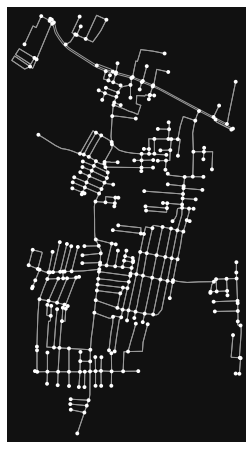

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [35]:
# Defining the map boundaries 
north, east, south, west = 12.9173, 77.6835,12.8957, 77.6720
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  
# Plotting the map graph 
ox.plot_graph(G)

In [36]:
# Displaying the 3rd node 
list(G.nodes(data=True))
t=list(G.nodes(data=True))
a =list(G.edges(data=True))
#list(G.edges(data=True))

In [37]:
list3=[]
list1=[]
edges=[]
for i in range(0,len(a)):
    e=list(G.edges(data=True)) [i][1]
    d=list(G.edges(data=True)) [i][0]
    c=list(G.edges(data=True)) [i][2]['length']
    n = str(d)
    p= str(e)
    tuple_a= (d,e,c)
    list3.append(e)
    edges.append(tuple_a)
    list1.append(d)
    #print(tuple_a)
edges

[(264845660, 4474486981, 40.729),
 (264845660, 6132030447, 92.456),
 (264845740, 1315048083, 33.195),
 (264845740, 3872540688, 87.428),
 (264845740, 3872540686, 32.018),
 (264845751, 3872533488, 50.119),
 (264845751, 3872533478, 57.223),
 (264845751, 1417462707, 218.159),
 (267215656, 3148668084, 41.237),
 (267215656, 3148580198, 13.515),
 (267215656, 2206930283, 179.374),
 (267215731, 6182622809, 57.204),
 (267215731, 7465559601, 31.483),
 (267215731, 7465559595, 29.914),
 (267215731, 7465559593, 164.986),
 (267215735, 7465559570, 60.594),
 (267215735, 7465559601, 30.929),
 (267215735, 7465559599, 85.327),
 (267215735, 7465559602, 78.039),
 (267216110, 7465559590, 125.716),
 (1244527875, 2828324523, 52.365),
 (1244527875, 2387579010, 100.197),
 (1244527875, 1244527888, 46.155),
 (1244527888, 6342458097, 60.729),
 (1244527888, 1244527875, 46.155),
 (1244527888, 1315049037, 141.888),
 (1314078752, 10264514242, 26.082),
 (1314078755, 10264514243, 17.449),
 (1315048058, 1315048061, 79.934

In [38]:
# define origin and desination locations 
origin_point = (12.9142471, 77.6791715) 
destination_point = (12.8962203, 77.6759762)
destination_point1 = (12.9139037, 77.6783721)
# get the nearest nodes to the locations 
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)
destination_node1 = ox.get_nearest_node(G, destination_point1)
# printing the closest node id to origin and destination points 
origin_node, destination_node,destination_node1

(5807148396, 7465559590, 4285700669)

In [39]:
# Python3 implementation to build a
# graph using Dictionaries
 
from collections import defaultdict
 
# Function to build the graph
def build_graph():
    graph = defaultdict(list)
     
    # Loop to iterate over every
    # edge of the graph
    for edge in edges:
        a, b = edge[0], edge[1]
         
        # Creating the graph
        # as adjacency list
        graph[a].append(b)
        graph[b].append(a)
    return graph
 
if __name__ == "__main__":
    graph = build_graph()

defaultdict(<class 'list'>, {264845660: [4474486981, 6132030447, 4474486981, 4540978393], 4474486981: [264845660, 7298619246, 10172979413, 264845660, 7298619246, 10172979413], 6132030447: [264845660, 3157670225, 3255184180, 3157670225, 3255184180, 2389701677], 264845740: [1315048083, 3872540688, 3872540686, 1315048083, 3872540686, 3872540688], 1315048083: [264845740, 1315048075, 264845740, 1315048075, 2387579012, 2387579012], 3872540688: [264845740, 3872533485, 3872533486, 3872533486, 3872533485, 3872540689, 264845740, 3872540689], 3872540686: [264845740, 3872533485, 3872540684, 3872540684, 3872533485, 264845740], 264845751: [3872533488, 3872533478, 1417462707, 1417462707, 3872533478, 3872533488], 3872533488: [264845751, 3872533482, 264845751, 3872533490, 3872533482, 3872533490], 3872533478: [264845751, 3872533473, 3872533475, 3872533473, 264845751, 3872533475], 1417462707: [264845751, 7465559603, 264845751, 9179098296, 7465559603, 9179098296], 267215656: [3148668084, 3148580198, 22069

In [40]:
def BFS_SP(graph, start, goal):
    explored = []
    queue = [[start]]
    if start == goal:
        return [start], 0
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                route = list(path)
                route.append(neighbour)
                queue.append(route)
                if neighbour == goal:
                    return route, len(route) - 1
            explored.append(node)
    return [], -1


In [41]:
route, distance = BFS_SP(graph, origin_node, destination_node)
print(route)
print(distance)

[5807148396, 2099691637, 2387361293, 6183009077, 1315048078, 1315049037, 1244527888, 1244527875, 2828324523, 9708811990, 3148668115, 10173119095, 9726335995, 6758669191, 2387579019, 2206930274, 2206930259, 2206930268, 2206930256, 3148668095, 2206930292, 3148668077, 3148668061, 3148668062, 3148668057, 1458422427, 6182622809, 267215731, 7465559593, 7465559592, 7465559590]
30


In [42]:
# getting coordinates of the nodes
# we will store the longitudes and latitudes in following list 
long = [] 
lat = []  
for i in route:
     point = G.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

In [43]:
print(point)

{'y': 12.8967884, 'x': 77.6751591, 'street_count': 3}


In [44]:
print(long)
print(lat)

[77.6795699, 77.6787787, 77.6787521, 77.6811877, 77.6809915, 77.6808931, 77.6808599, 77.6804345, 77.6803826, 77.680373, 77.6803468, 77.6803267, 77.6802991, 77.6803, 77.6800473, 77.6797533, 77.6795282, 77.678775, 77.6783311, 77.6778469, 77.6774807, 77.6771703, 77.6770963, 77.6766663, 77.6756845, 77.6754732, 77.6754646, 77.6754572, 77.6753799, 77.6752832, 77.6751591]
[12.9142502, 12.9135696, 12.9135075, 12.9122487, 12.9117566, 12.9101606, 12.908885, 12.9088682, 12.9084, 12.9082913, 12.9079938, 12.9077664, 12.9074535, 12.9072869, 12.9061336, 12.9046997, 12.9035406, 12.9018169, 12.9018594, 12.9019577, 12.9020285, 12.9020616, 12.9016717, 12.9016991, 12.9019088, 12.9000095, 12.8994107, 12.8988963, 12.8974212, 12.897144, 12.8967884]


In [45]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [46]:
plot_path(lat, long, origin_point, destination_point)